In [99]:
import pandas as pd  #importing necessary libraries to build the ann models
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras
import warnings 
warnings.filterwarnings("ignore")

In [100]:
df=pd.read_csv(r"C:\Users\USER\Downloads\sonardataset.csv") #importing the datasets

In [103]:
df 

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [104]:
df.head() #printing first 5 rows

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [105]:
df.info() #data informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [106]:
df.describe #sescribing data

<bound method NDFrame.describe of         x_1     x_2     x_3     x_4     x_5     x_6     x_7     x_8     x_9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

       x_10  ... 

In [107]:
df.value_counts #counting each values

<bound method DataFrame.value_counts of         x_1     x_2     x_3     x_4     x_5     x_6     x_7     x_8     x_9  \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

       x_10

In [108]:
df.describe() #summary statistics

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [109]:
df.isnull().sum() #checking null values

x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64

In [110]:
df.duplicated().sum() #checking for duplicates

np.int64(0)

<Axes: >

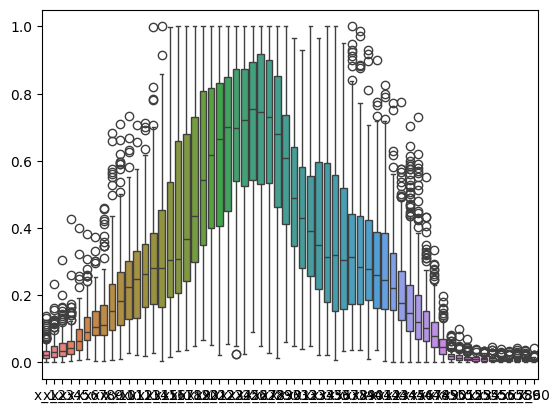

In [111]:
sns.boxplot(df) #checking for outliers through th boxplots

In [112]:
def outlier_capping(df,columns): #removing outliers through outlier_capping methods
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[columns]=df[columns].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

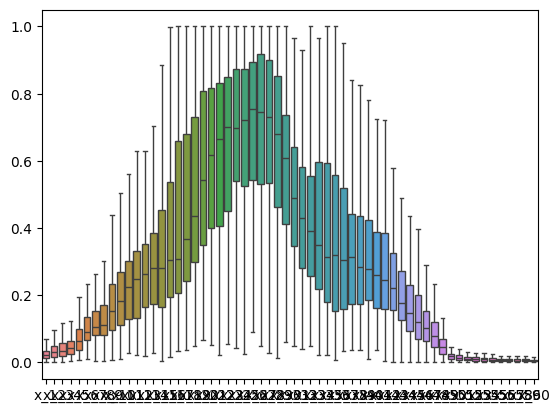

In [113]:
sns.boxplot(df) #boxplot after removing outliers

In [114]:
labels=LabelEncoder() #encode the categorical column y mine=0 and rock=1

In [115]:
df["Y"]=labels.fit_transform(df["Y"])

In [116]:
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.02000,0.0371,0.0428,0.0207,0.0954,0.098600,0.1539,0.160100,0.310900,0.211100,...,0.0027,0.0065,0.0159,0.0072,0.016700,0.018000,0.0084,0.0090,0.0032,1
1,0.04530,0.0523,0.0843,0.0689,0.1183,0.234775,0.2156,0.303362,0.333700,0.287200,...,0.0084,0.0089,0.0048,0.0094,0.019100,0.014000,0.0049,0.0052,0.0044,1
2,0.02620,0.0582,0.1099,0.1083,0.0974,0.228000,0.2431,0.303362,0.438025,0.504838,...,0.0232,0.0166,0.0095,0.0180,0.019838,0.020512,0.0164,0.0095,0.0078,1
3,0.01000,0.0171,0.0623,0.0205,0.0205,0.036800,0.1098,0.127600,0.059800,0.126400,...,0.0121,0.0036,0.0150,0.0085,0.007300,0.005000,0.0044,0.0040,0.0117,1
4,0.06885,0.0666,0.0481,0.0394,0.0590,0.064900,0.1209,0.246700,0.356400,0.445900,...,0.0031,0.0054,0.0105,0.0110,0.001500,0.007200,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.01870,0.0346,0.0168,0.0177,0.0393,0.163000,0.2028,0.169400,0.232800,0.268400,...,0.0116,0.0098,0.0199,0.0033,0.010100,0.006500,0.0115,0.0193,0.0157,0
204,0.03230,0.0101,0.0298,0.0564,0.0760,0.095800,0.0990,0.101800,0.103000,0.215400,...,0.0061,0.0093,0.0135,0.0063,0.006300,0.003400,0.0032,0.0062,0.0067,0
205,0.05220,0.0437,0.0180,0.0292,0.0351,0.117100,0.1257,0.117800,0.125800,0.252900,...,0.0160,0.0029,0.0051,0.0062,0.008900,0.014000,0.0138,0.0077,0.0031,0
206,0.03030,0.0353,0.0490,0.0608,0.0167,0.135400,0.1465,0.112300,0.194500,0.235400,...,0.0086,0.0046,0.0126,0.0036,0.003500,0.003400,0.0079,0.0036,0.0048,0


In [117]:
features=df.drop(columns="Y") #defining features

In [118]:
targets=df[["Y"]] #defing targets

In [119]:
features

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60
0,0.02000,0.0371,0.0428,0.0207,0.0954,0.098600,0.1539,0.160100,0.310900,0.211100,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.016700,0.018000,0.0084,0.0090,0.0032
1,0.04530,0.0523,0.0843,0.0689,0.1183,0.234775,0.2156,0.303362,0.333700,0.287200,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.019100,0.014000,0.0049,0.0052,0.0044
2,0.02620,0.0582,0.1099,0.1083,0.0974,0.228000,0.2431,0.303362,0.438025,0.504838,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.019838,0.020512,0.0164,0.0095,0.0078
3,0.01000,0.0171,0.0623,0.0205,0.0205,0.036800,0.1098,0.127600,0.059800,0.126400,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.007300,0.005000,0.0044,0.0040,0.0117
4,0.06885,0.0666,0.0481,0.0394,0.0590,0.064900,0.1209,0.246700,0.356400,0.445900,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.001500,0.007200,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.01870,0.0346,0.0168,0.0177,0.0393,0.163000,0.2028,0.169400,0.232800,0.268400,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.010100,0.006500,0.0115,0.0193,0.0157
204,0.03230,0.0101,0.0298,0.0564,0.0760,0.095800,0.0990,0.101800,0.103000,0.215400,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.006300,0.003400,0.0032,0.0062,0.0067
205,0.05220,0.0437,0.0180,0.0292,0.0351,0.117100,0.1257,0.117800,0.125800,0.252900,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.008900,0.014000,0.0138,0.0077,0.0031
206,0.03030,0.0353,0.0490,0.0608,0.0167,0.135400,0.1465,0.112300,0.194500,0.235400,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.003500,0.003400,0.0079,0.0036,0.0048


In [120]:
targets

,Y
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [121]:
x_train,x_test,y_train,y_test=train_test_split(features,targets,test_size=0.2,random_state=42) #traintestspilt the data in 20-80

In [122]:
x_train.shape

(166, 60)

In [123]:
x_test.shape

(42, 60)

In [124]:
y_train.shape

(166, 1)

In [125]:
y_test.shape

(42, 1)

In [126]:
ann=keras.Sequential() #defining ann model

In [127]:
ann.add(keras.layers.Dense(units=32,input_shape=(60,),activation="relu")), #adding hidden layer output and dropouts
ann.add(keras.layers.Dropout(0.2)),
ann.add(keras.layers.Dense(units=16,activation="relu")),
ann.add(keras.layers.Dense(units=8,activation="relu")),
ann.add(keras.layers.Dense(units=1,activation="sigmoid"))        

In [128]:
ann.compile( #compiling the ann models
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [129]:
ann.fit(x_train,y_train,epochs=100) #fitting the model on training data

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5482 - loss: 0.6973
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5723 - loss: 0.6854 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5663 - loss: 0.6847  
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5301 - loss: 0.6876 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5783 - loss: 0.6761 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6145 - loss: 0.6703 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5843 - loss: 0.6712 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6145 - loss: 0.6610 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5964 - loss: 0.6634 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6205 - loss: 0.6483 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6084 - loss: 0.6364 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6325 - los

In [131]:
ann.evaluate(x_test,y_test) #evaluate the model on testing data

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8571 - loss: 0.3458


[0.345772385597229, 0.8571428656578064]

In [132]:
y_predicts=ann.predict(x_test) #predicting the model performances

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [133]:
y_preds=[] #coverting predictions continuos values to 0s and 1s
for elements in y_predicts:
    if elements>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [134]:
y_preds

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1]

In [135]:
y_test[:13]

,Y
161,0
15,1
73,1
96,1
166,0
9,1
100,0
135,0
18,1
148,0


In [136]:
y_preds[:13]

[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]

In [137]:
print(classification_report(y_test,y_preds)) #models performance through classifcation reports

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.78      0.88      0.82        16

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [138]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds) #confusion matrix to check the 

In [139]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[22,  4],
       [ 2, 14]], dtype=int32)>

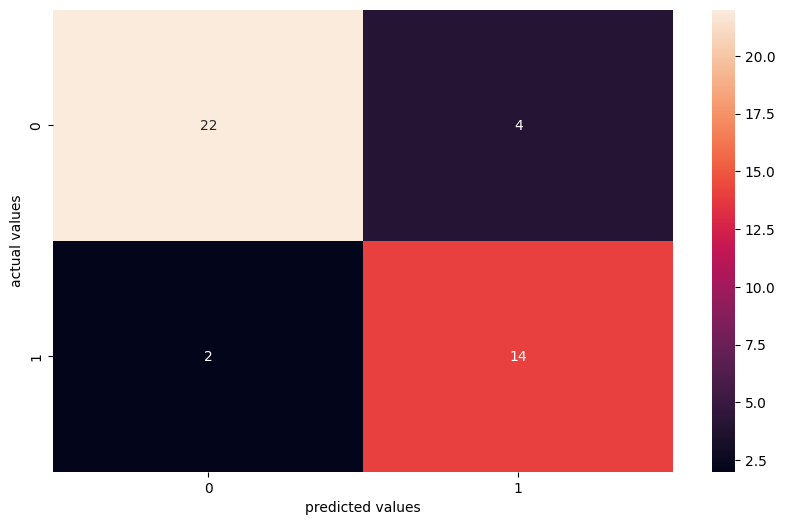

In [140]:
plt.figure(figsize=(10,6)) #heat map to show the performances through confusion matrix
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

In [253]:
def ann_models(hidden_units1=32,hidden_units2=16,hidden_units3=8,dropout_rates=0.2,learning_rate=0.001): #function for tunings
    ann=keras.Sequential()
    ann.add(keras.layers.Dense(units=hidden_units1,input_shape=(60,),activation=activation_1))
    ann.add(keras.layers.Dropout(dropout_rates))
    ann.add(keras.layers.Dense(units=hidden_units2,activation=activation_1))
    ann.add(keras.layers.Dense(units=hidden_units3,activation=activation_1))
    ann.add(keras.layers.Dense(units=units,activation=activation_2)) 
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    ann.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )        
    return ann_models
    

In [254]:
from scikeras.wrappers import KerasClassifier

In [255]:
classifiers=KerasClassifier( #kerasclassifiers to wrap the models
    models=ann_models,
    verbose=0,
)

In [256]:
params = { #parameters for tunings
    "model__hidden_units1": [32, 64, 128],
    "model__hidden_units2": [16, 32, 64],
    "model__hidden_units3": [8, 16, 32],
    "model__dropout_rate": [0.0, 0.2, 0.4],
    "model__learning_rate": [1e-3, 1e-4, 1e-5],
    "batch_size": [16, 32, 64],
    "epochs": [50, 100, 200]
}

In [257]:
from sklearn.model_selection import RandomizedSearchCV

In [258]:
rands=RandomizedSearchCV( #random search to tune the parameters
    estimator=clf,
    param_distributions=params,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    random_state=42

)

In [259]:
rands.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,KerasClassifi..._weight=None )
,param_distributions,"{'batch_size': [16, 32, ...], 'epochs': [50, 100, ...], 'model__dropout_rate': [0.0, 0.2, ...], 'model__hidden_units1': [32, 64, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [262]:
print("Best params:", rands.best_params_) #parameters obtained from tunings

Best params: {'model__learning_rate': 0.001, 'model__hidden_units3': 8, 'model__hidden_units2': 32, 'model__hidden_units1': 128, 'model__dropout_rate': 0.4, 'epochs': 200, 'batch_size': 64}


In [278]:
ann=keras.Sequential()

In [279]:
ann.add(keras.layers.Dense(units=128,input_shape=(60,),activation="relu")),
ann.add(keras.layers.Dropout(0.4)),
ann.add(keras.layers.Dense(units=32,activation="relu")),
ann.add(keras.layers.Dense(units=8,activation="relu")),
ann.add(keras.layers.Dense(units=1,activation="sigmoid"))        

In [280]:
ann.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [281]:
ann.fit(x_train,y_train,epochs=200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5060 - loss: 0.7067
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5783 - loss: 0.6802  
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5723 - loss: 0.6853
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5964 - loss: 0.6767 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5482 - loss: 0.6760  
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6084 - loss: 0.6638
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6265 - loss: 0.6535  
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6867 - loss: 0.6378 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6145 - loss: 0.6443 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6747 - loss: 0.6393 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6687 - loss: 0.6296 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6747 - l

In [282]:
ann.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9048 - loss: 0.3289 


[0.32893672585487366, 0.9047619104385376]

In [290]:
y_predictss=ann.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 


In [291]:
y_test[:13]

,Y
161,0
15,1
73,1
96,1
166,0
9,1
100,0
135,0
18,1
148,0


In [292]:
y_predictss[:13]

array([[0.00127197],
       [0.9995527 ],
       [0.5266869 ],
       [0.9999296 ],
       [0.00901798],
       [0.812062  ],
       [0.30876115],
       [0.02443525],
       [0.9999999 ],
       [0.08014479],
       [0.08916239],
       [0.9998391 ],
       [0.21201447]], dtype=float32)

In [294]:
y_predss=[]
for elements in y_predictss:
    if elements>0.5:
        y_predss.append(1)
    else:
        y_predss.append(0)

In [295]:
y_test[:13]

,Y
161,0
15,1
73,1
96,1
166,0
9,1
100,0
135,0
18,1
148,0


In [297]:
y_predss[:13]

[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

In [298]:
print(classification_report(y_test,y_predss)) #model performaces for tuned parameters

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.83      0.94      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



In [300]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predss)

In [301]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[23,  3],
       [ 1, 15]], dtype=int32)>

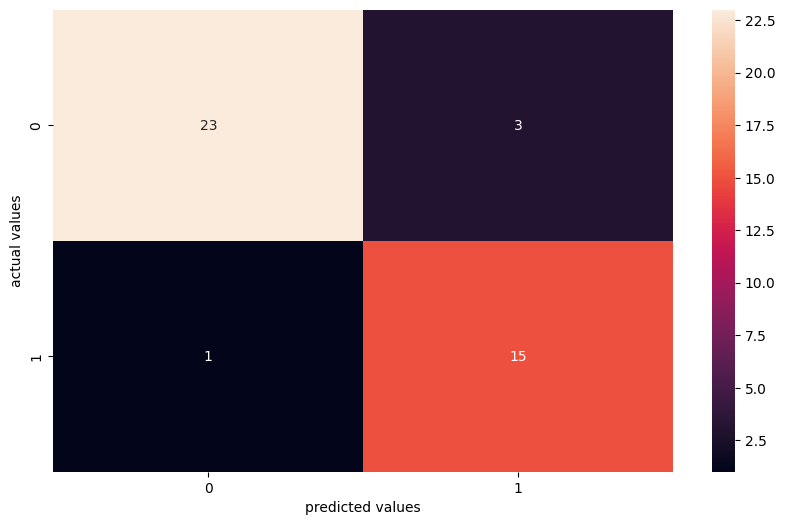

In [302]:
plt.figure(figsize=(10,6)) #predicted heatmapsss
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

models performace before and after tuningsss

1. Accuracy
Before tuning: 0.86
After tuning: 0.90 
Observation: Overall, your model now predicts correctly 4% more of the time. That’s a noticeable improvement for a small dataset (42 samples).

2. Precision
Class 0 (negative class): 0.92 → 0.96 
Class 1 (positive class): 0.78 → 0.83 
Observation: The model is now better at avoiding false positives. Especially for Class 1, precision improvement shows the model is less likely to wrongly label a negative sample as positive.

3. Recall
Class 0: 0.85 - 0.88 
Class 1: 0.88 - 0.94 
Observation: Recall for Class 1 improved significantly. This means your model is catching more of the actual positive samples  Very important if missing positive cases is costly.

4. F1-Score
Class 0: 0.88 - 0.92 
Class 1: 0.82 - 0.88 
Observation: F1-score combines precision & recall, so the improvement here shows your model is now more balanced and effective at both classes.

5. Macro & Weighted Averages
Macro avg F1: 0.85 - 0.90 
Weighted avg F1: 0.86 - 0.91 
Observation: The overall performance across classes has improved, and weighting by class distribution shows the improvement is meaningful given the class imbalances.

Conclusion

Hyperparameter tuning clearly helped our ANN:
Accuracy improved by 4%.
Recall for Class 1  increased the most.
F1-scores show better balance between precision and recalls.